## The data grabbed from four antenna QFH array

The Parallella (Pcko) grabbing unit was used to capture triggered data from QFH. Trigger was generated by button. The QFH mixer was tunned to 370.5 MHz. 

In [64]:
import os
from readrec import *
import matplotlib
from scipy.signal import find_peaks


sps = 10e6 # 10 Msps
path = "/storage/experiments/2021/0822_bourka_sobeslav_auto0/QFH/"
files = ["rec_210822-161651.79"]

for fn in os.listdir(path)[:1]:
    with open(os.path.join(path, fn), 'rb') as f:
        try:
            h, samples, synclog = loadrec(f, skipsamples=True)
        except Exception as e:
            print(fn, e)
            continue


In [174]:
def selective_plotrec(h, samples, synclog, fn, pre_trigger_blocks=10, post_trigger_blocks=5, title=None, marktimes=[]):
    t2s, s2t, ticker, formatter = assign_time_axis(fn, h, synclog)
    
    if pre_trigger_blocks > h['preTrigger']:
        pre_trigger_blocks = h['preTrigger']
    if post_trigger_blocks > h['postTrigger']:
        post_trigger_blocks = h['postTrigger']
    
    a = (h['preTrigger']-pre_trigger_blocks)*h['descSpan']//16 #select block of samples before trigger
    b = (h['preTrigger']+post_trigger_blocks)*h['descSpan']//16  #select blocks after trigger 
        
    fig, (ax7) = plt.subplots(figsize=(28, 8), nrows=1, sharex=True)
    if title is not None:
        fig.suptitle(title)
        
    ax7.xaxis.set_major_locator(ticker)
    ax7.xaxis.set_major_formatter(formatter)


    ax7.plot(range(a, b), samples[a:b,6:8], linestyle="", marker="o", alpha=0.5, markersize=1)
    signal_samples = samples[a:b,6]
    window_size = 10000
    start_noise_std = np.std(signal_samples[:window_size])
    start_noise_mean = np.mean(signal_samples[:window_size])
    stop_noise_std = np.std(signal_samples[-window_size:])
    stop_noise_mean = np.mean(signal_samples[-window_size:])
    
    threshold = -3
    for sample_num in range(0,len(signal_samples)):
        z_score = (signal_samples[sample_num] - start_noise_mean) / start_noise_std
        if z_score < threshold:
            event_start = sample_num
            break

    for sample_num in reversed(range(0,len(signal_samples))):
        z_score = (signal_samples[sample_num] - stop_noise_mean) / stop_noise_std
        if z_score < threshold:
            event_stop = sample_num
            break

            
    ax7.set_title("Channels 6 and 7")
    ax7.set_xlabel('')
    ax7.set_ylim(-8000, 8000)
    
    event_duration = (event_stop-event_start)/10e6
    ax7.text(a+event_stop/2, 6000,"Event Duration: {0:.3g} s".format(event_duration), fontsize=15)
    ax7.axvspan(event_start+a,event_stop+a, facecolor='green', alpha=0.5)
    
    at, bt = s2t(a), s2t(b)
    for t in marktimes:
        if t > at and t < bt:
            for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
                ax.axvline(x=t2s(t), color='purple', ls='--')
    return fig

## Plotting of the data

* Channels 0 to 7 were connected to the QFH antennas. A I/Q pair for each antenna


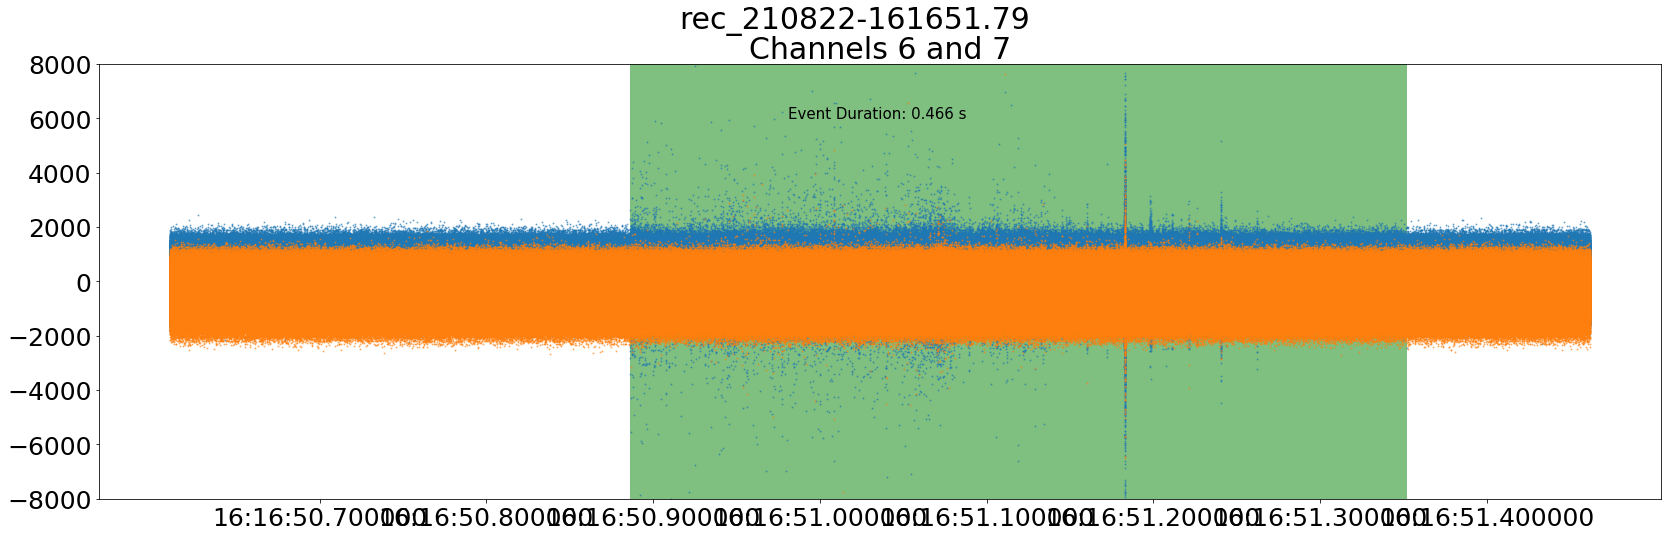

In [175]:
import os
pre_trigger_blocks = 180
post_trigger_blocks = -50

matplotlib.rcParams.update({'font.size':25})

for fn in files:
    with open(os.path.join(path, fn), 'rb') as f:
        try:
            h, samples, synclog = loadrec(f)
            fig = selective_plotrec(h, samples, synclog, os.path.basename(fn),
                    title=os.path.basename(fn),
                    pre_trigger_blocks = pre_trigger_blocks,
                    post_trigger_blocks = post_trigger_blocks,
                    #marktimes=marktimes
                    )
   
        except Exception as e:
            print(e)

Plot all lightning records (High memory and time consuming)

In [ ]:
import os
pre_trigger_blocks = 100
post_trigger_blocks = 100

for fn in os.listdir(path):
    with open(os.path.join(path, fn), 'rb') as f:
        try:
            h, samples, synclog = loadrec(f)
            fig = plotrec(h, samples, synclog, os.path.basename(fn),
                    title=os.path.basename(fn),
                    pre_trigger_blocks = pre_trigger_blocks,
                    post_trigger_blocks = post_trigger_blocks,
                    #marktimes=marktimes
                    )
            #fig.savefig(os.path.basename(fn) + '.png', bbox_inches='tight')
            #fig.clear()
            #plt.close(fig)
            plt.show()
            print(synclog)
        except Exception as e:
            print(e)